# Pulsar Emission Data Analysis

In [60]:
#currently including any and all Imports that maybe needed for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from scipy import stats
import statistics
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat

#### Section for extracting from a tar file. ####

##### Currently implemented for original TAR File structure.

In [61]:
#This is also found in the main file under tarunzip.py
import tarfile
import os
import sys

#tar = tarfile.open("pulseTarFile.tar")
#tar.extractall('./Data')
#tar.close()

## Beginning of Exploration

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [62]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar6 = pd.read_csv("Data/J0437-4715.pulses", sep = ' ', header = None, names = colnames)

In [63]:
pulsar6.shape

(27000, 3)

In [64]:
pulsar6.head(25)

,Pulse Number,Brightness,Uncertainty
0,1,0.598393,0.056431
1,2,0.590859,0.055182
2,3,0.449643,0.063632
3,4,0.682860,0.056269
4,5,0.490026,0.046830
5,6,0.586071,0.052649
6,7,0.150353,0.056483
7,8,0.384684,0.052567
8,9,0.429094,0.055569
9,10,0.995865,0.075811


In [65]:
pulsar6.describe()

,Pulse Number,Brightness,Uncertainty
count,27000.00000,27000.000000,27000.000000
mean,13500.50000,0.536400,0.062556
std,7794.37297,0.413764,0.056313
min,1.00000,-5.114133,0.015426
25%,6750.75000,0.296443,0.052381
50%,13500.50000,0.423816,0.056856
75%,20250.25000,0.643723,0.063111
max,27000.00000,18.722410,3.049559


In [66]:
pulsar6["Brightness"].describe()

count    27000.000000
mean         0.536400
std          0.413764
min         -5.114133
25%          0.296443
50%          0.423816
75%          0.643723
max         18.722410
Name: Brightness, dtype: float64

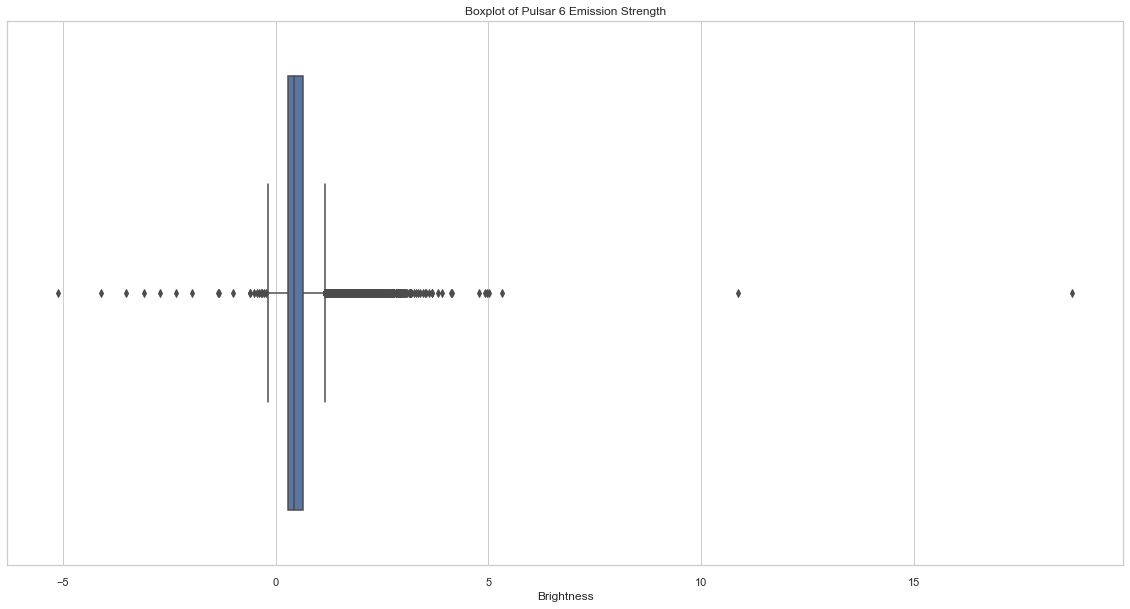

In [67]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

In [68]:
#numpy method of outlier removal

pulsar6npcleaned = pulsar6[(np.abs(stats.zscore(pulsar6["Brightness"])) <3)]
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty
0,1,0.598393,0.056431
1,2,0.590859,0.055182
2,3,0.449643,0.063632
3,4,0.682860,0.056269
4,5,0.490026,0.046830
...,...,...,...
26995,26996,0.539079,0.063854
26996,26997,0.324070,0.054332
26997,26998,0.291341,0.058106
26998,26999,0.346267,0.058064


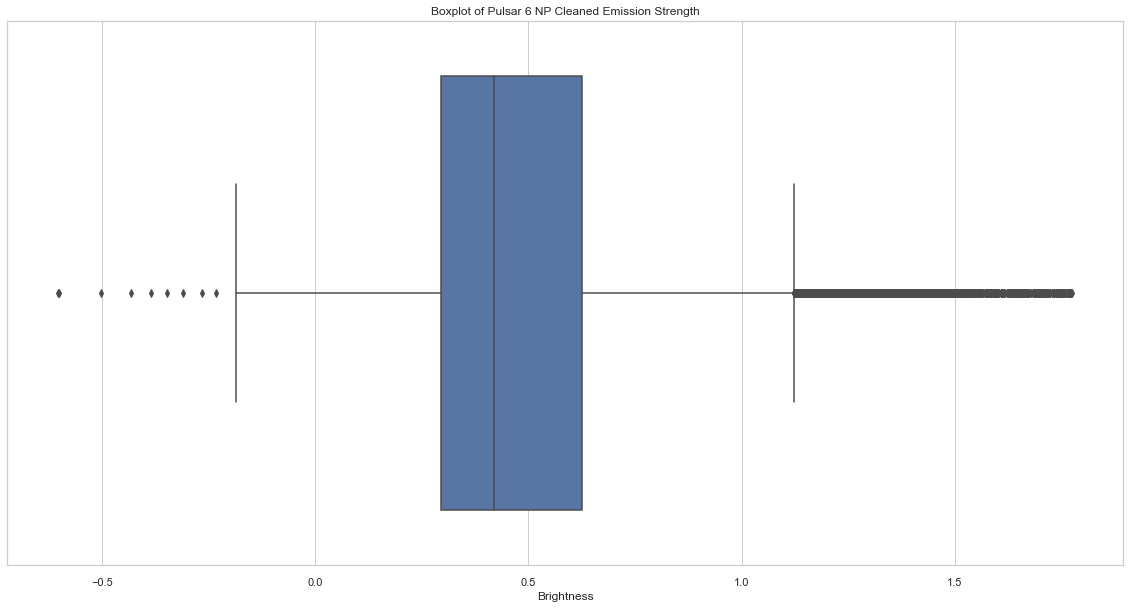

In [69]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6npcleaned["Brightness"]).set_title("Boxplot of Pulsar 6 NP Cleaned Emission Strength")

In [70]:
pulsar6npcleaned["Brightness"].describe()

count    26528.000000
mean         0.506225
std          0.308193
min         -0.602834
25%          0.294498
50%          0.418518
75%          0.626096
max          1.776057
Name: Brightness, dtype: float64

In [71]:
pulsar6npcleaned["Brightness"].median()

0.41851835000000004

In [72]:
medianpulse6 = pulsar6["Brightness"].median()
print("Median of Pulsar6: ", medianpulse6)
pulsar6['Binary'] = np.where(pulsar6['Brightness'] > medianpulse6, 1, 0)

Median of Pulsar6:  0.42381595


In [73]:
pulsar6

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.598393,0.056431,1
1,2,0.590859,0.055182,1
2,3,0.449643,0.063632,1
3,4,0.682860,0.056269,1
4,5,0.490026,0.046830,1
...,...,...,...,...
26995,26996,0.539079,0.063854,1
26996,26997,0.324070,0.054332,0
26997,26998,0.291341,0.058106,0
26998,26999,0.346267,0.058064,0


In [74]:
median = pulsar6npcleaned["Brightness"].median()
print("Median of Pulsar6 np cleaned: ", median)
pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)

Median of Pulsar6 np cleaned:  0.41851835000000004


C:\Users\oxlay\AppData\Local\Temp/ipykernel_36972/1919336679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)


In [75]:
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.598393,0.056431,1
1,2,0.590859,0.055182,1
2,3,0.449643,0.063632,1
3,4,0.682860,0.056269,1
4,5,0.490026,0.046830,1
...,...,...,...,...
26995,26996,0.539079,0.063854,1
26996,26997,0.324070,0.054332,0
26997,26998,0.291341,0.058106,0
26998,26999,0.346267,0.058064,0


c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


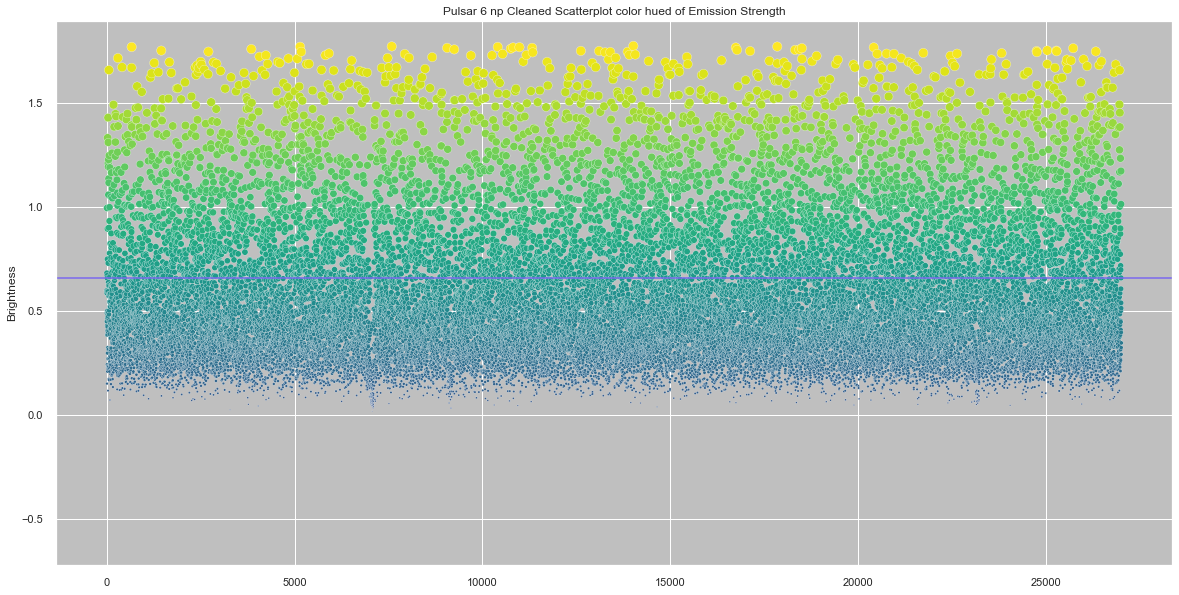

In [76]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6npcleaned.Brightness.values
ax = sns.scatterplot(data=pulsar6npcleaned["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6589028, ls='-',c='mediumslateblue')

In [77]:
print(len(pulsar6npcleaned[(pulsar6npcleaned.Brightness > 0.6589028)]))
print(len(pulsar6npcleaned[(pulsar6npcleaned.Brightness < 0.6589028)]))

6022
20506


c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


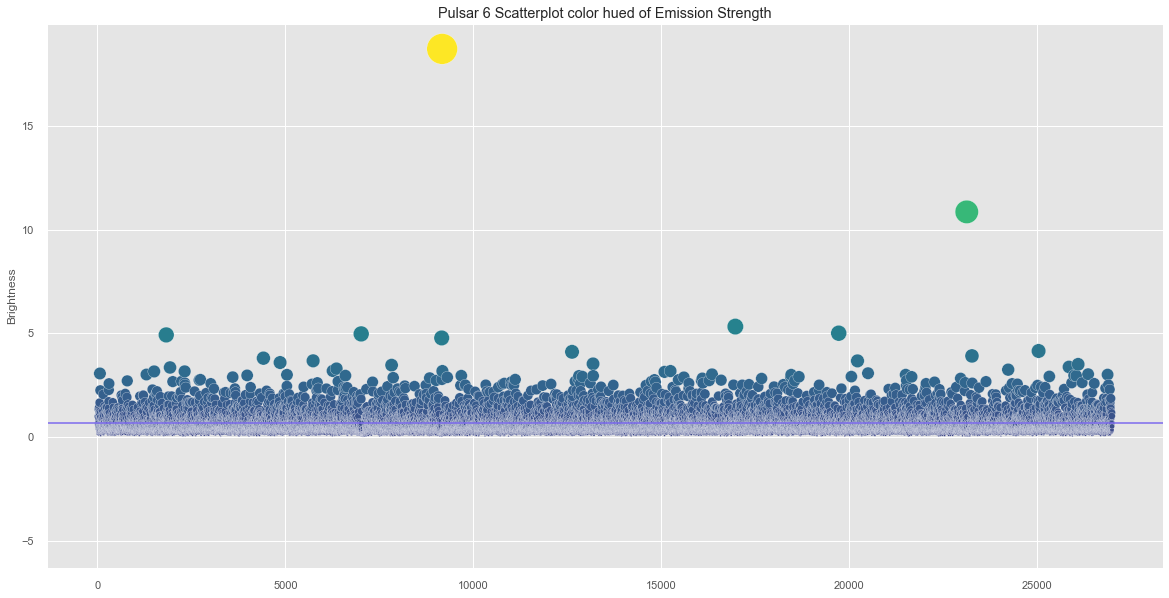

In [78]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')

In [79]:
print(len(pulsar6[(pulsar6.Brightness > 0.6589028)]))
print(len(pulsar6[(pulsar6.Brightness < 0.6589028)]))

6484
20516


In [80]:
#plt.figure(figsize=(20,10))
#sns.set_style("darkgrid", {"axes.facecolor": ".75"})
#strength = pulsar6.Brightness.values
#ax = plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')
#ax = sns.swarmplot(data=pulsar6["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')


In [81]:
#plt.figure(figsize=(20,10))
#sns.set_style("darkgrid", {"axes.facecolor": ".75"})
#strength = pulsar6npcleaned.Brightness.values
#ax = sns.swarmplot(data=pulsar6npcleaned["Brightness"]).set_title('Pulsar 6 np cleaned Swarm plot of Emission Strength')
#ax = plt.axhline( y=0.6589028, ls='-', c='mediumslateblue')

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 Brightness')

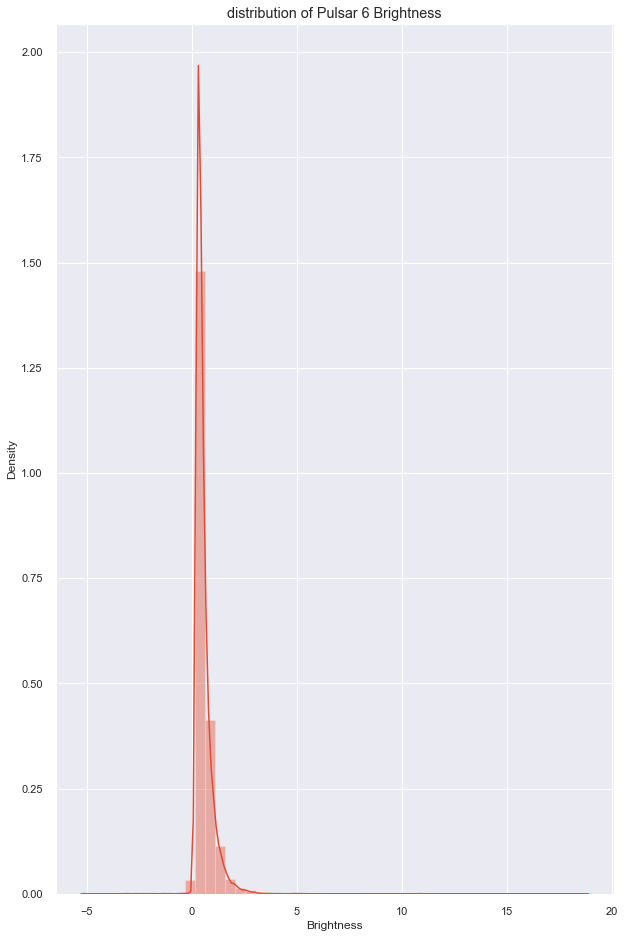

In [82]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Brightness)
plt.title("distribution of Pulsar 6 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned Brightness')

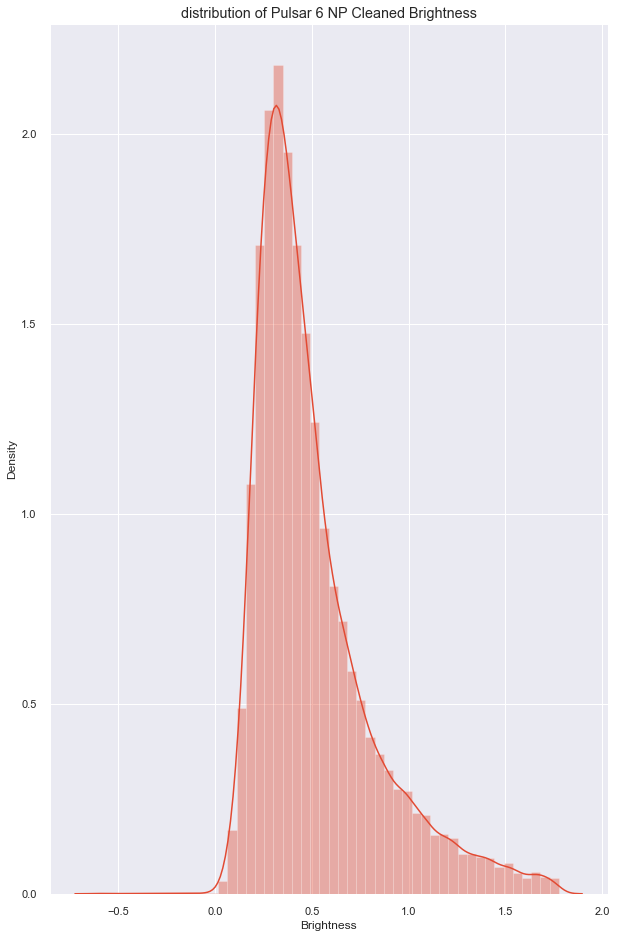

In [83]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Brightness)
plt.title("distribution of Pulsar 6 NP Cleaned Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned binary assignments')

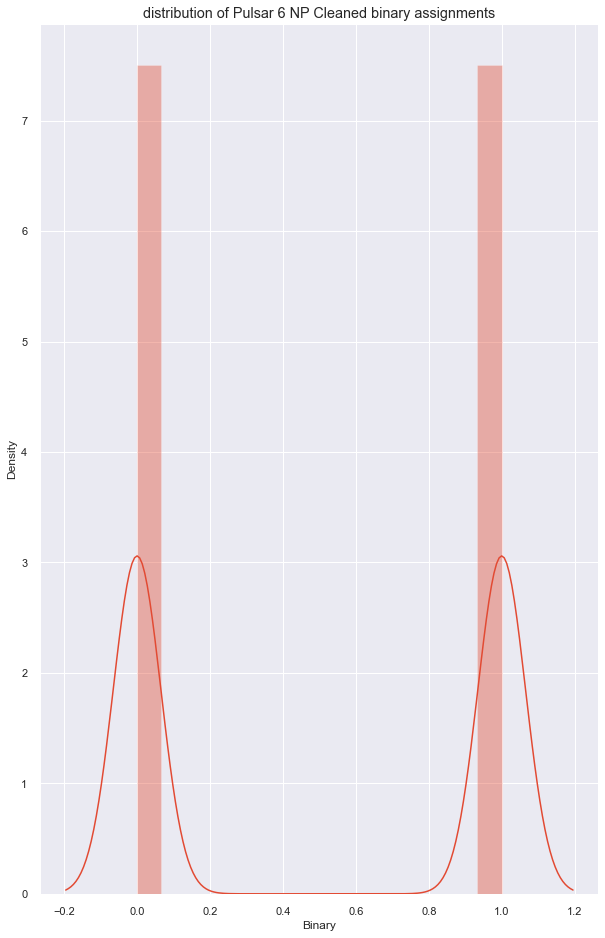

In [84]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Binary)
plt.title("distribution of Pulsar 6 NP Cleaned binary assignments")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 binary assignments')

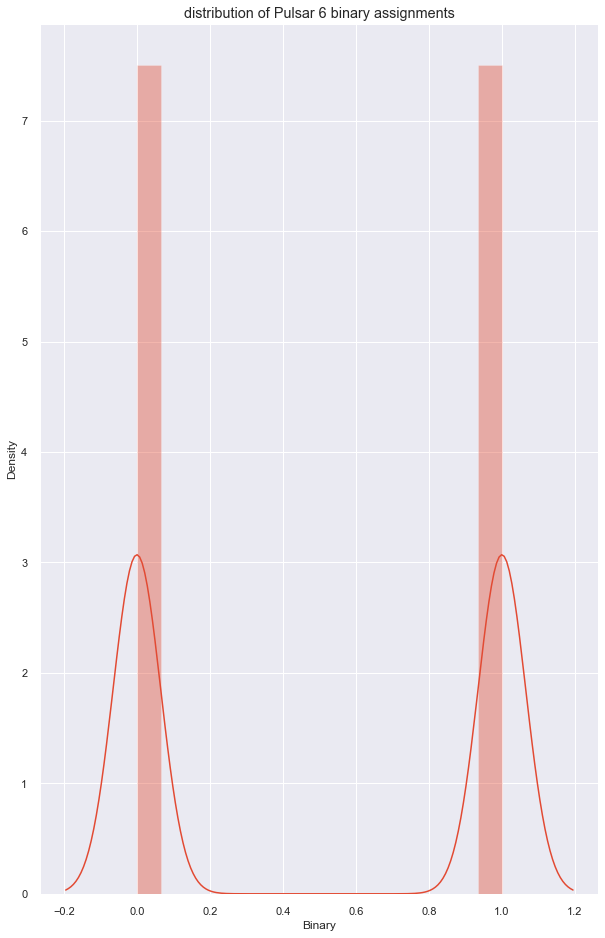

In [85]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Binary)
plt.title("distribution of Pulsar 6 binary assignments")

# Preliminary runs test
### Math Logic

$$ Z = {R - \tilde{R} \over s_{R}} $$

$$ \tilde{R} = {2_{n1 n2} \over n1 + n2} + 1 $$

$$  s^2_{R} = {2_{n1n2}(2{n1n2-n1-n2}) \over (n1+n2)^2(n1+n2-1) }$$

link to resource: https://www.geeksforgeeks.org/runs-test-of-randomness-in-python/

$ Z_{critical} = 1.96 $ as the confidence interval level of 95% thus this is a 2 tailed test. If the probability as corrosponding to this confidence interval $ H_{null} $ will be rejected as it is not statistically significant as denoted by $|Z| > Z_{critical} $

There is also code attempting to change it from a z-score probability to a P-score for ease of understanding and clarity.

# FUNCTION CODE FOR RUNS TEST

In [86]:
# MUST BE PASSED A LIST AND A INT/FLOAT 


def runsTest(data, dataMedian):
    runs = 0
    above = 0
    below = 0

    for i in range(len(data)):
        if(data[i] >= dataMedian and data[i-1] < dataMedian) or (data[i] < dataMedian and data[i-1] >= dataMedian):
            runs += 1
        
        if(data[i] >= dataMedian):
            above += 1
        
        else:
            below += 1
    
    R = ((2*above*below)/(above+below))+1
    #sdevTemp = (2*above*below*(2*above*below-above-below))/(((above+below)**2)*(above+below-1))
    #sdevTemp = (2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)*2)*(n1+n2-1))
    Sdev = math.sqrt((2*above*below*(2*above*below-above-below))/(((above+below)**2)*(above+below-1)))   

    float(Sdev)
    float(R)
    float(runs)
    z = (runs-R)/Sdev
    return z     

In [87]:
binaryData1 = pulsar6['Binary'].tolist()
print("pulsar6 original: ",binaryData1)

binaryData1nooutlier = pulsar6npcleaned['Binary'].tolist()
print("\n pulsar6 original: ", binaryData1nooutlier)

pulsar6 original:  [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [88]:
print("Brightness Median Test")
Zscore = abs(runsTest(binaryData1, medianpulse6))
Pval = stats.norm.sf(abs(Zscore))*2
print('Z Statistic is: ', Zscore)
print('P Value is : ', Pval)

if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')

print("Binary Median Test")
binarymedian1 = pulsar6["Binary"].median()

Zscore = abs(runsTest(binaryData1, binarymedian1))
Pval = stats.norm.sf(abs(Zscore))*2
print('Z Statistic is: ', Zscore)
print('P Value is : ', Pval)

if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')


print("Removed outliers from dataset")
Zscore = abs(runsTest(binaryData1nooutlier, median))
Pval = stats.norm.sf(abs(Zscore))*2
print('Z Statistic is: ', Zscore)
print('P Value is : ', Pval)

if(Zscore >= 1.96):
    print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

if(Pval <= 0.05):
    print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')

Brightness Median Test
Z Statistic is:  2.957756586333936
P Value is :  0.0030988672273746134
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.
Binary Median Test
Z Statistic is:  2.957756586333936
P Value is :  0.0030988672273746134
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.
Removed outliers from dataset
Z Statistic is:  3.082191715305754
P Value is :  0.002054824499935343
We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.
We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.


# Analysis of the preliminary data analysis

We can see here through our printouts the value of both Z Statistic based on the above Runs Test of Randomness and the approximate correlative P-value.

If the conditional prints are not activated it meants there is no statistical significance to reject the $H_{null}$

$ H_{null} $ is where the numbers are randomly generated and sequenced
-
$ H_{alt} $ is where the numbers are not randomly generated or sequenced
-


Further testing can be done with more variety of datasets with pythonic libraries and R librariest such as NIST and Rrandtest (placeholders cant remember their names)


# Below we begin autocorrelation and autocovariance analysis

To get started with this I am playing around with guide from: https://towardsdatascience.com/a-step-by-step-guide-to-calculating-autocorrelation-and-partial-autocorrelation-8c4342b784e8

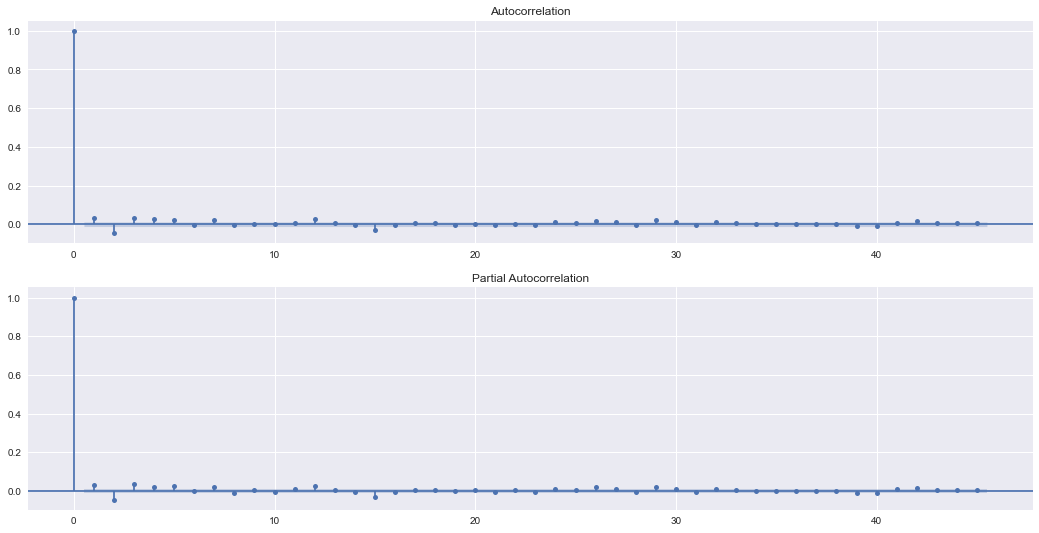

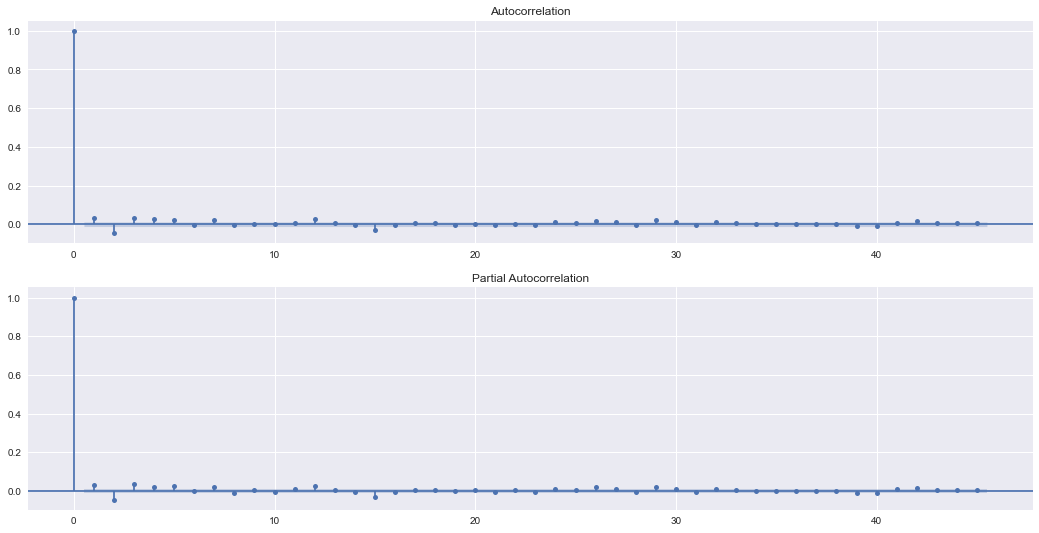

In [89]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar6['Brightness'], ax=ax[0])
plot_pacf(pulsar6['Brightness'], ax=ax[1], method="ols")

In [90]:
acf(pulsar6['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00,  3.02297520e-02, -4.45596588e-02,  3.11934730e-02,
        2.59222929e-02,  2.29438690e-02, -2.72483478e-03,  2.17140483e-02,
       -5.63815508e-03,  1.61127481e-03, -7.10167005e-04])

In [91]:
acfpulsar6 = pd.DataFrame()
for lag in range(0,11):
    acfpulsar6[f"B_lag_{lag}"] = pulsar6['Brightness'].shift(lag)


acfpulsar6

,B_lag_0,B_lag_1,B_lag_2,B_lag_3,B_lag_4,B_lag_5,B_lag_6,B_lag_7,B_lag_8,B_lag_9,B_lag_10
0,0.598393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.590859,0.598393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.449643,0.590859,0.598393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.682860,0.449643,0.590859,0.598393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.490026,0.682860,0.449643,0.590859,0.598393,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26995,0.539079,0.396929,1.014446,0.659313,1.173766,0.606806,0.500412,0.409631,0.698172,0.262350,0.447577
26996,0.324070,0.539079,0.396929,1.014446,0.659313,1.173766,0.606806,0.500412,0.409631,0.698172,0.262350
26997,0.291341,0.324070,0.539079,0.396929,1.014446,0.659313,1.173766,0.606806,0.500412,0.409631,0.698172
26998,0.346267,0.291341,0.324070,0.539079,0.396929,1.014446,0.659313,1.173766,0.606806,0.500412,0.409631


In [92]:
acfpulsar6.corr()["B_lag_0"].values

array([ 1.00000000e+00,  3.02297663e-02, -4.45598682e-02,  3.11938480e-02,
        2.59227920e-02,  2.29443159e-02, -2.72489307e-03,  2.17154085e-02,
       -5.63853223e-03,  1.61145686e-03, -7.10263111e-04])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [93]:
held5ths = pulsar6[pulsar6.index % 5 == 0]
held5ths

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.598393,0.056431,1
5,6,0.586071,0.052649,1
10,11,0.670907,0.049539,1
15,16,0.404870,0.056679,0
20,21,0.297223,0.048826,0
...,...,...,...,...
26975,26976,0.384184,0.070075,0
26980,26981,0.317133,0.055033,0
26985,26986,0.447577,0.054011,1
26990,26991,0.606806,0.043464,1


In [94]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

0.43021975

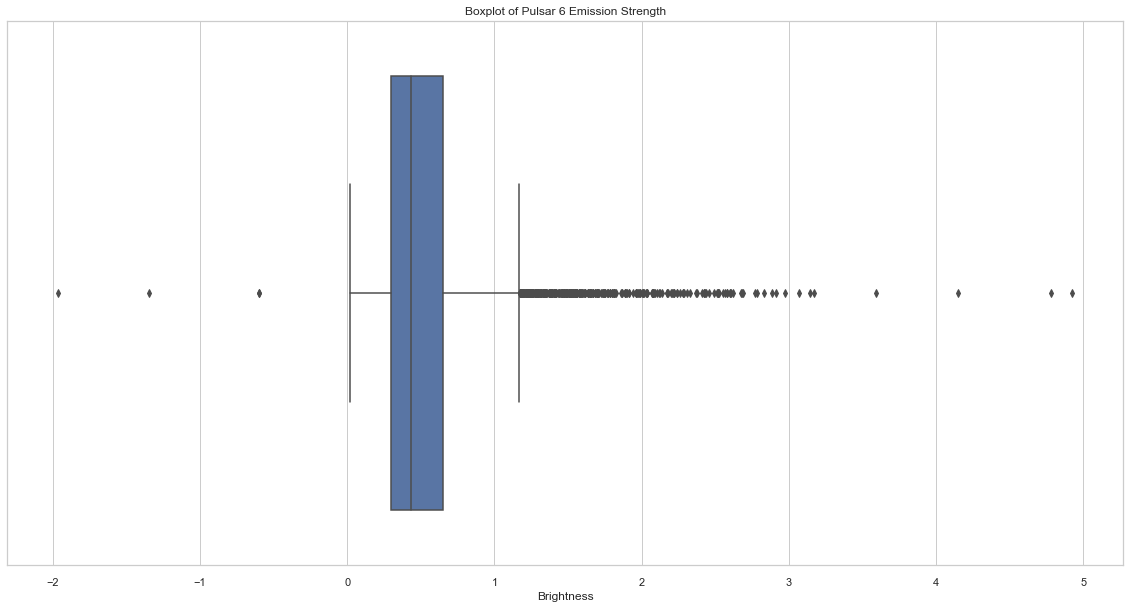

In [95]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

c:\Users\oxlay\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


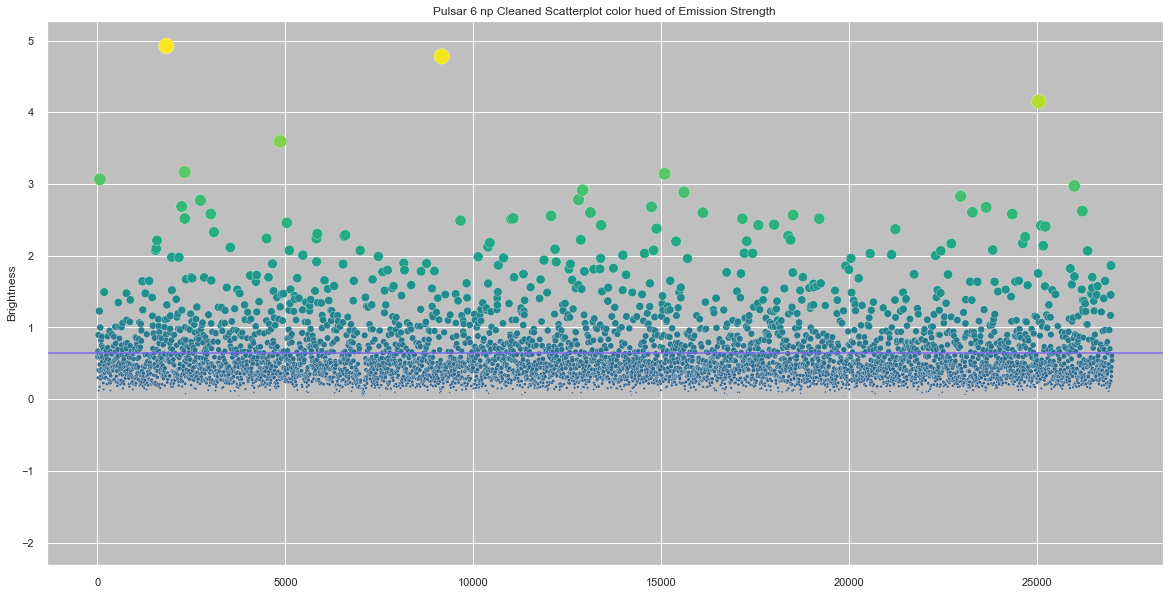

In [96]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')

In [97]:
#plt.figure(figsize=(20,10))
#sns.set_style("darkgrid", {"axes.facecolor": ".75"})
#strength = held5ths.Brightness.values
#ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')
#ax = sns.swarmplot(data=held5ths["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [98]:
print(len(held5ths[(held5ths.Brightness > 0.6508051)]))
print(len(held5ths[(held5ths.Brightness < 0.6508051)]))

1339
4061


#### isolating every 100 rows into discrete sets.

In [99]:
size = 100
N = int(len(pulsar6)/size)
pulsarsubframes = [pulsar6.iloc[i*size:(i+1)*size].copy() for i in range(N+1)]
#pulsarsubframes[-1]

frame1 = pulsarsubframes[0]
frame2 = pulsarsubframes[1]
frame3 = pulsarsubframes[2]
frame4 = pulsarsubframes[3]
frame5 = pulsarsubframes[4]
frame6 = pulsarsubframes[5]
frame7 = pulsarsubframes[6]

medianframe1 = frame1["Brightness"].median()
print("Median of Pulsar6: ", medianframe1)
frame1['Binary'] = np.where(frame1['Brightness'] > 0.6589028, 1, 0)

medianframe2 = frame2["Brightness"].median()
print("Median of Pulsar6: ", medianframe2)
frame2['Binary'] = np.where(frame2['Brightness'] > 0.6589028, 1, 0)

medianframe3 = frame3["Brightness"].median()
print("Median of Pulsar6: ", medianframe3)
frame3['Binary'] = np.where(frame3['Brightness'] > 0.6589028, 1, 0)

medianframe4 = frame4["Brightness"].median()
print("Median of Pulsar6: ", medianframe4)
frame4['Binary'] = np.where(frame4['Brightness'] > 0.6589028, 1, 0)

medianframe5 = frame5["Brightness"].median()
print("Median of Pulsar6: ", medianframe5)
frame5['Binary'] = np.where(frame5['Brightness'] > 0.6589028, 1, 0)

medianframe6 = frame6["Brightness"].median()
print("Median of Pulsar6: ", medianframe6)
frame6['Binary'] = np.where(frame6['Brightness'] > 0.6589028, 1, 0)

medianframe7 = frame7["Brightness"].median()
print("Median of Pulsar6: ", medianframe7)
frame7['Binary'] = np.where(frame7['Brightness'] > 0.6589028, 1, 0)

Median of Pulsar6:  0.4867248
Median of Pulsar6:  0.4286911
Median of Pulsar6:  0.44755405
Median of Pulsar6:  0.3795496
Median of Pulsar6:  0.4444983
Median of Pulsar6:  0.40377745
Median of Pulsar6:  0.49524895


In [100]:
framebinary = []

In [101]:
print(frame1)

storeover1 = len(frame1[(frame1.Brightness > frame1["Brightness"].median())])
storeunder1 = len(frame1[(frame1.Brightness < frame1["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

    Pulse Number  Brightness  Uncertainty  Binary
0              1    0.598393     0.056431       0
1              2    0.590859     0.055182       0
2              3    0.449643     0.063632       0
3              4    0.682860     0.056269       1
4              5    0.490026     0.046830       0
..           ...         ...          ...     ...
95            96    0.824388     0.099823       1
96            97    0.230281     0.060355       0
97            98    0.322991     0.049434       0
98            99    0.585458     0.057843       0
99           100    0.546448     0.065107       0

[100 rows x 4 columns]


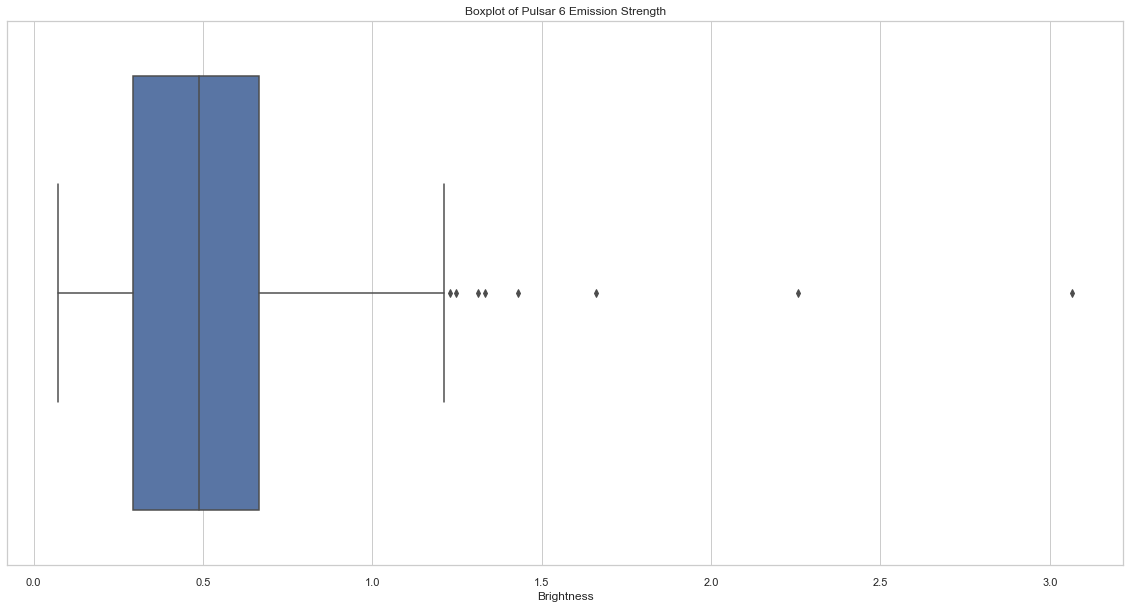

In [102]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame1["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

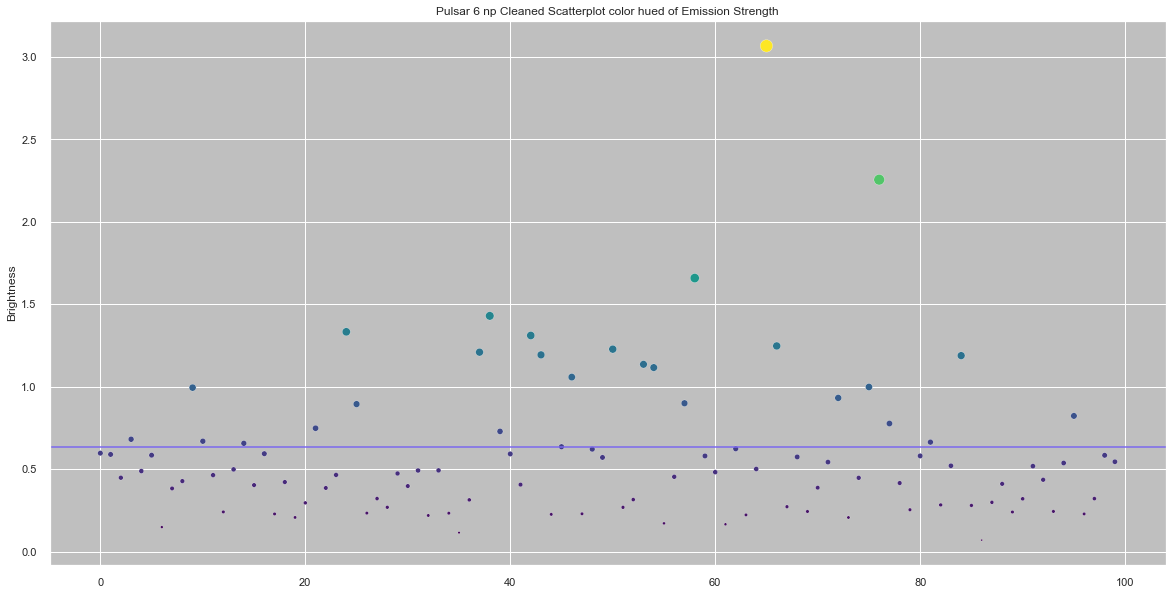

In [103]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame1.Brightness.values
ax = sns.scatterplot(data=frame1["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.63457545, ls='-',c='mediumslateblue')

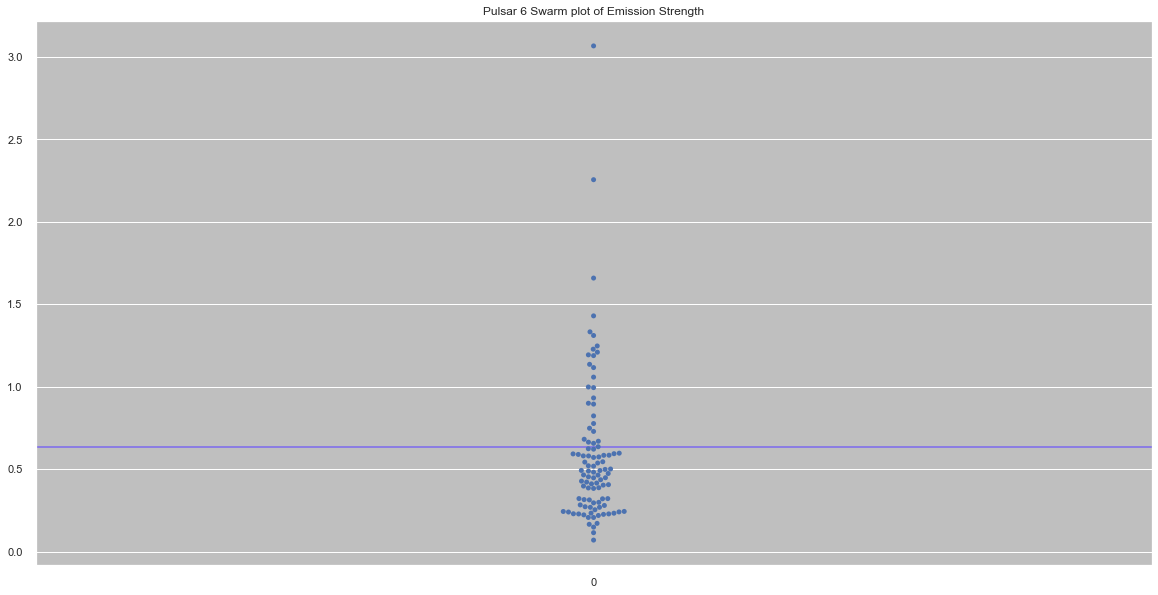

In [104]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame1.Brightness.values
ax = plt.axhline( y=0.63457545, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=frame1["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [105]:
print(frame2)

storeover1 = len(frame2[(frame2.Brightness > frame2["Brightness"].median())])
storeunder1 = len(frame2[(frame2.Brightness < frame2["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
100           101    0.419457     0.059585       0
101           102    0.369328     0.063171       0
102           103    0.425630     0.046590       0
103           104    0.195348     0.053453       0
104           105    0.240908     0.058218       0
..            ...         ...          ...     ...
195           196    0.291153     0.052048       0
196           197    0.342610     0.066164       0
197           198    1.386555     0.066667       1
198           199    0.665173     0.062952       1
199           200    0.690779     0.062173       1

[100 rows x 4 columns]


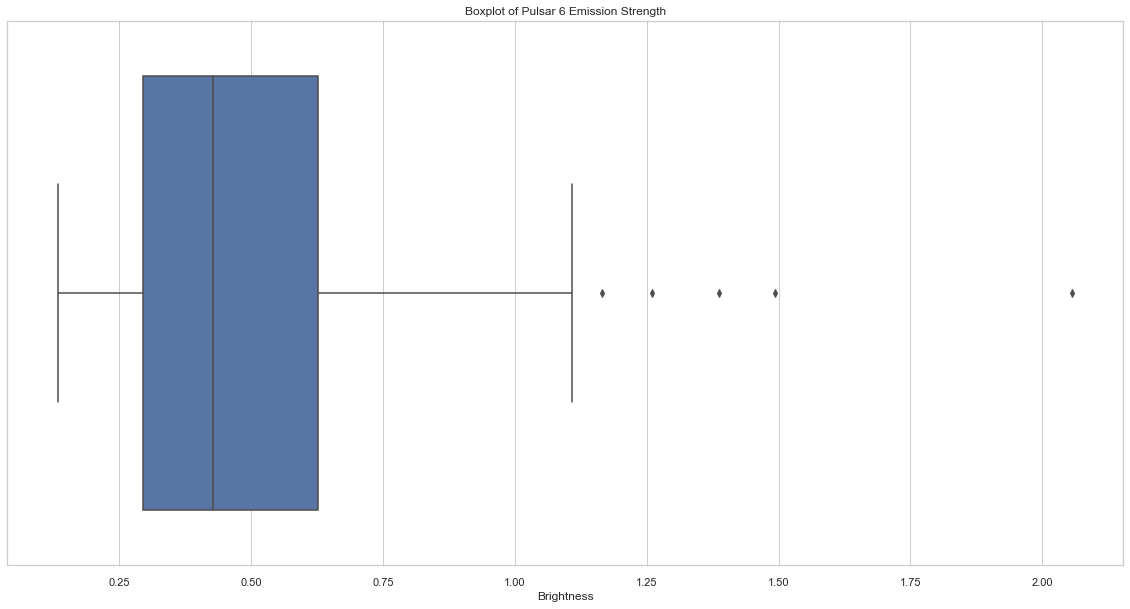

In [106]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame2["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

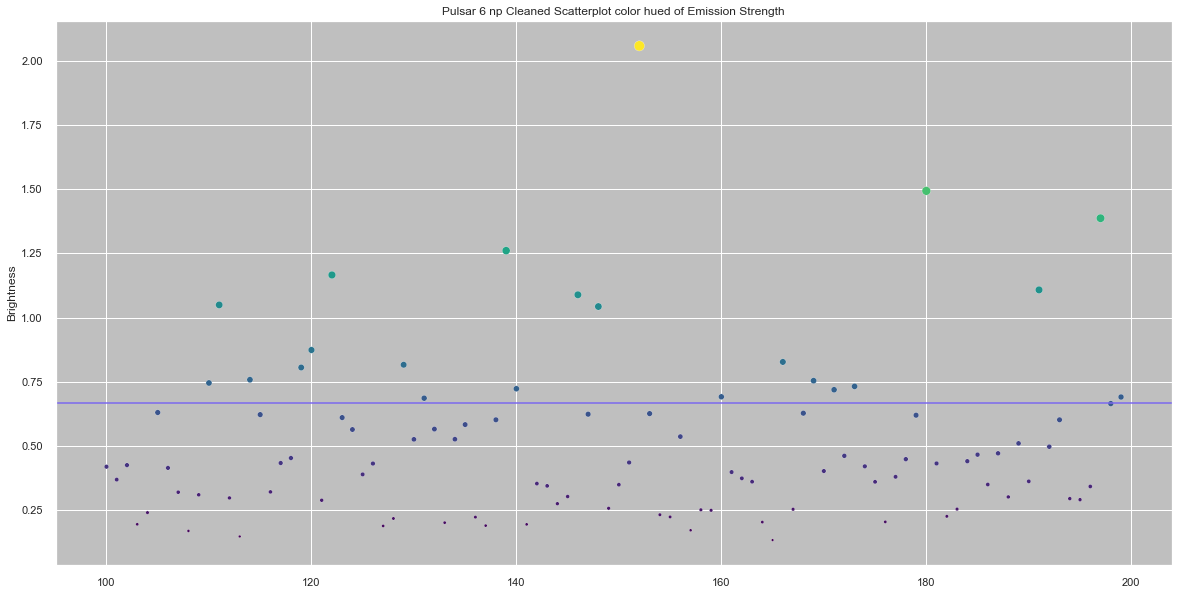

In [107]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame2.Brightness.values
ax = sns.scatterplot(data=frame2["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6688056, ls='-',c='mediumslateblue')

In [108]:
print(frame3)

storeover1 = len(frame3[(frame3.Brightness > frame3["Brightness"].median())])
storeunder1 = len(frame3[(frame3.Brightness < frame3["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
200           201    0.658651     0.054328       0
201           202    0.281783     0.053594       0
202           203    0.459488     0.059536       0
203           204    0.295926     0.049891       0
204           205    0.216138     0.049861       0
..            ...         ...          ...     ...
295           296    0.420822     0.080983       0
296           297    0.365270     0.050546       0
297           298    1.717613     0.119598       1
298           299    0.561604     0.054651       0
299           300    1.390326     0.086866       1

[100 rows x 4 columns]


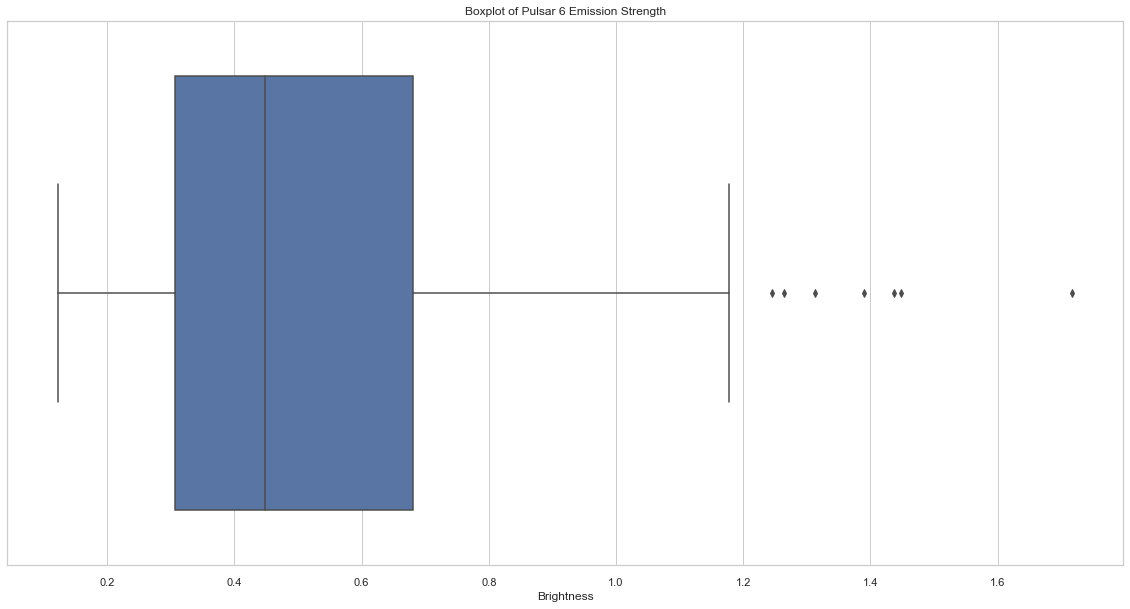

In [109]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame3["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

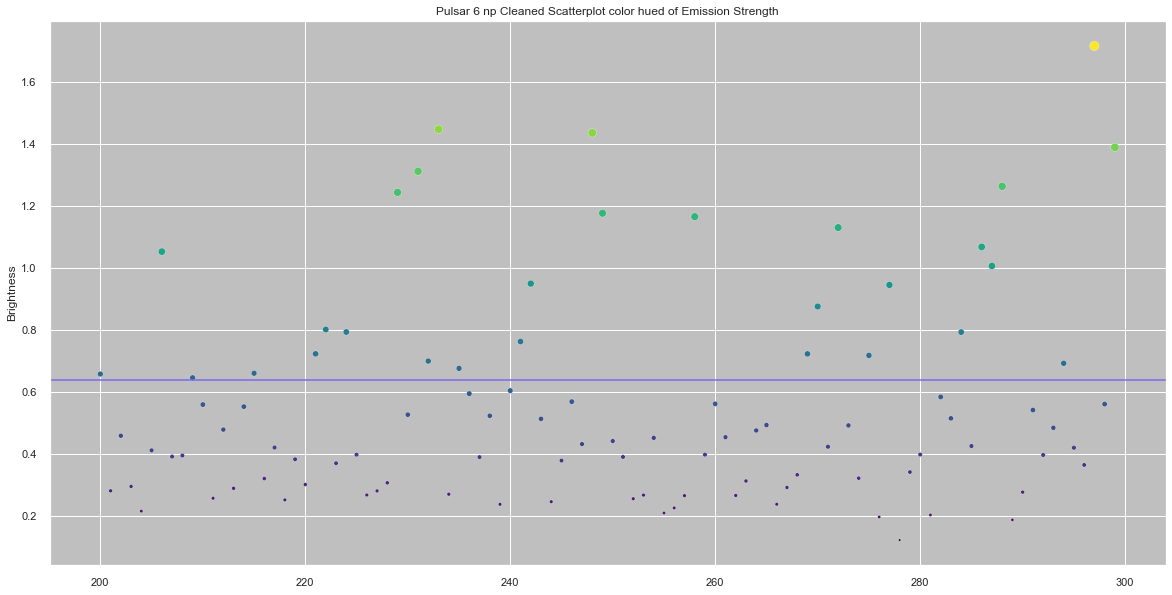

In [110]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame3.Brightness.values
ax = sns.scatterplot(data=frame3["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.63955675, ls='-',c='mediumslateblue')

In [111]:
print(frame4)

storeover1 = len(frame4[(frame4.Brightness > frame4["Brightness"].median())])
storeunder1 = len(frame4[(frame4.Brightness < frame4["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
300           301    0.366709     0.051129       0
301           302    0.537830     0.058867       0
302           303    2.270237     0.105041       1
303           304    0.869675     0.079490       1
304           305    0.327060     0.051071       0
..            ...         ...          ...     ...
395           396    0.392799     0.044964       0
396           397    0.950885     0.073460       1
397           398    0.539506     0.055900       0
398           399    0.467267     0.053209       0
399           400    0.229204     0.058423       0

[100 rows x 4 columns]


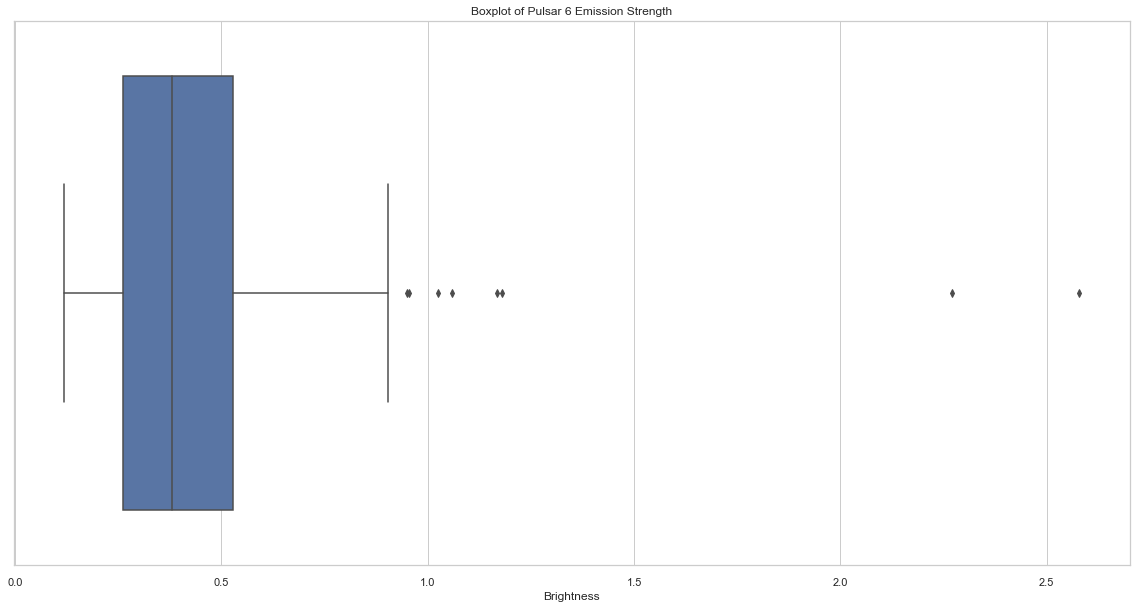

In [112]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame4["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

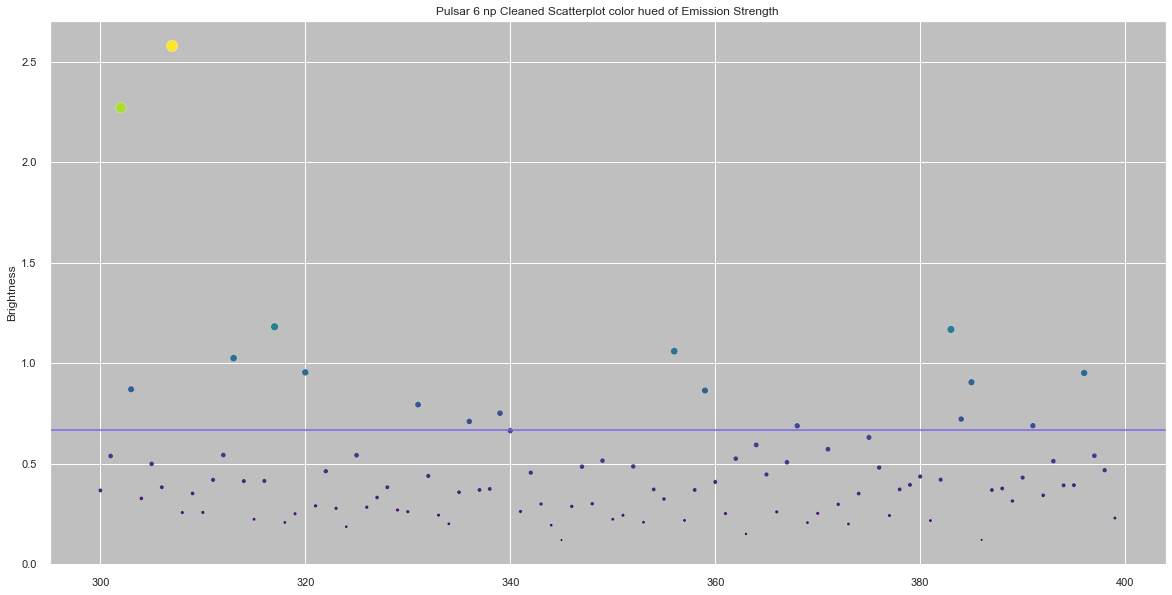

In [113]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame4.Brightness.values
ax = sns.scatterplot(data=frame4["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.66777675, ls='-',c='mediumslateblue')

In [114]:
print(frame5)

storeover1 = len(frame5[(frame5.Brightness > frame5["Brightness"].median())])
storeunder1 = len(frame5[(frame5.Brightness < frame5["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
400           401    0.517304     0.055678       0
401           402    1.068781     0.065274       1
402           403    0.984631     0.060970       1
403           404    0.472378     0.054836       0
404           405    0.304022     0.059802       0
..            ...         ...          ...     ...
495           496    0.242763     0.069841       0
496           497    0.514356     0.054976       0
497           498    1.339439     0.068976       1
498           499    0.562280     0.070394       0
499           500    0.264408     0.051032       0

[100 rows x 4 columns]


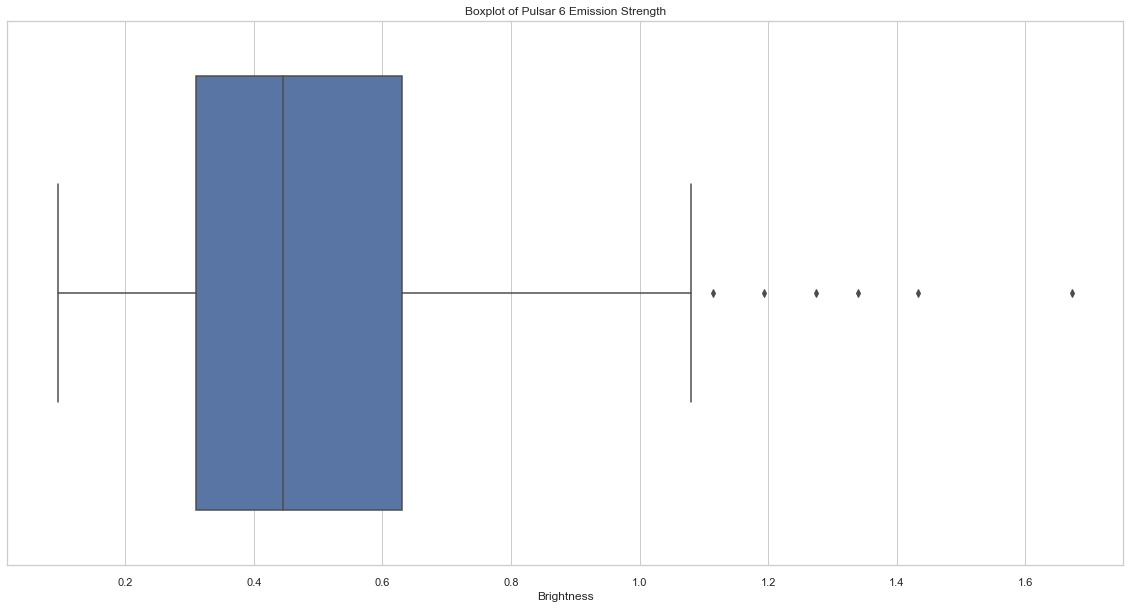

In [115]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame5["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

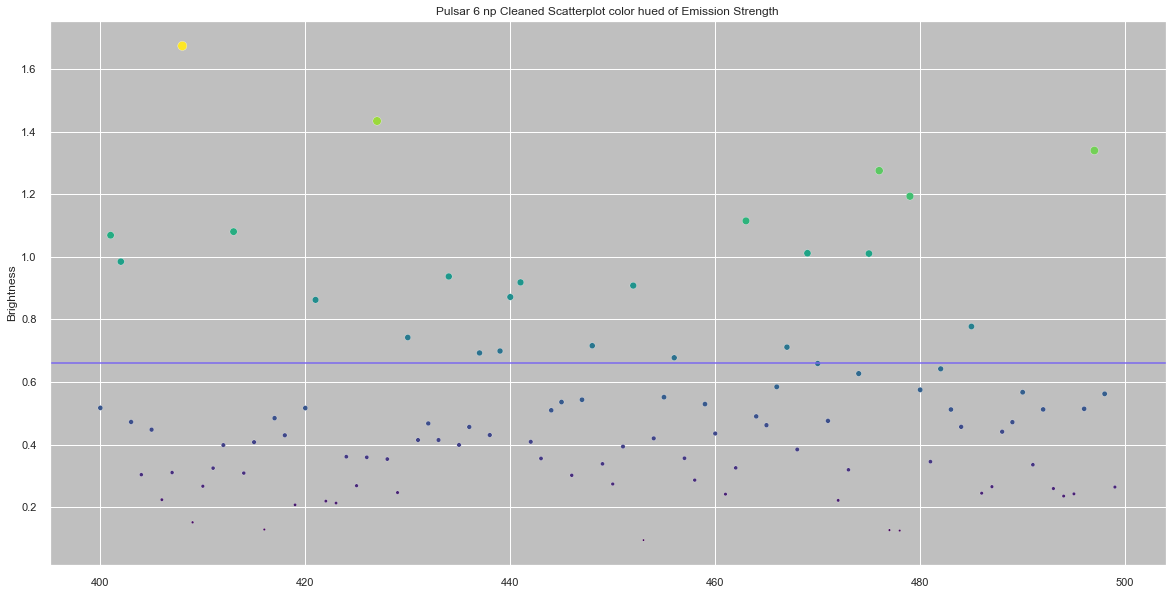

In [116]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame5.Brightness.values
ax = sns.scatterplot(data=frame5["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6605900499999999, ls='-',c='mediumslateblue')

In [117]:
print(frame6)

storeover1 = len(frame6[(frame6.Brightness > frame6["Brightness"].median())])
storeunder1 = len(frame6[(frame6.Brightness < frame6["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
500           501    0.319755     0.049767       0
501           502    0.274875     0.051246       0
502           503    0.345747     0.068054       0
503           504    0.592314     0.055221       0
504           505    0.215369     0.064722       0
..            ...         ...          ...     ...
595           596    0.347602     0.052976       0
596           597    0.248471     0.049865       0
597           598    0.468647     0.069941       0
598           599    0.442540     0.052855       0
599           600    0.684226     0.058438       1

[100 rows x 4 columns]


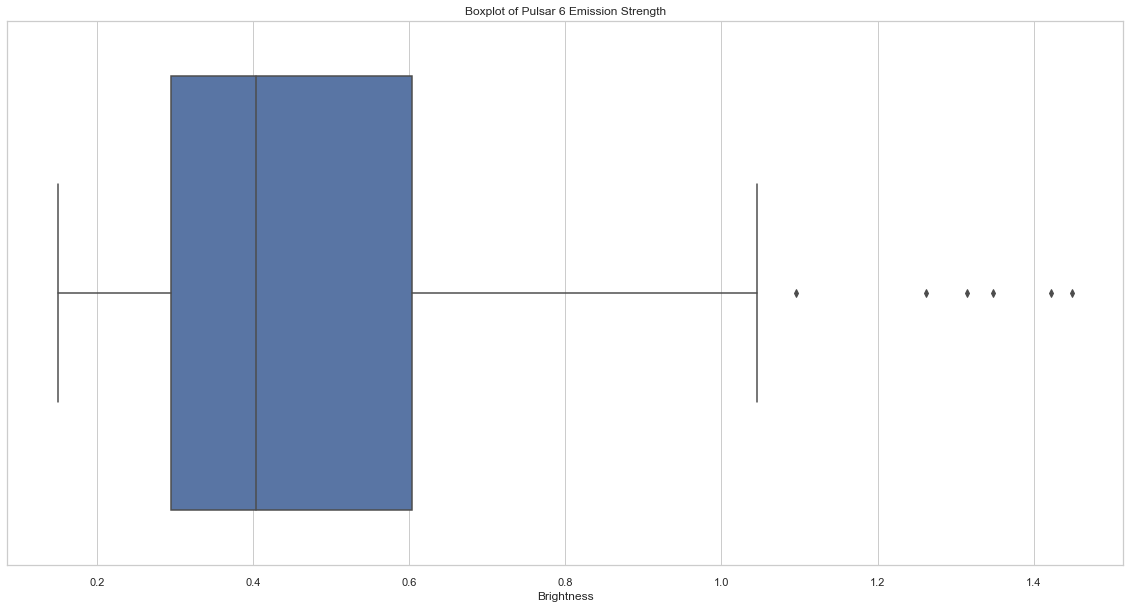

In [118]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame6["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

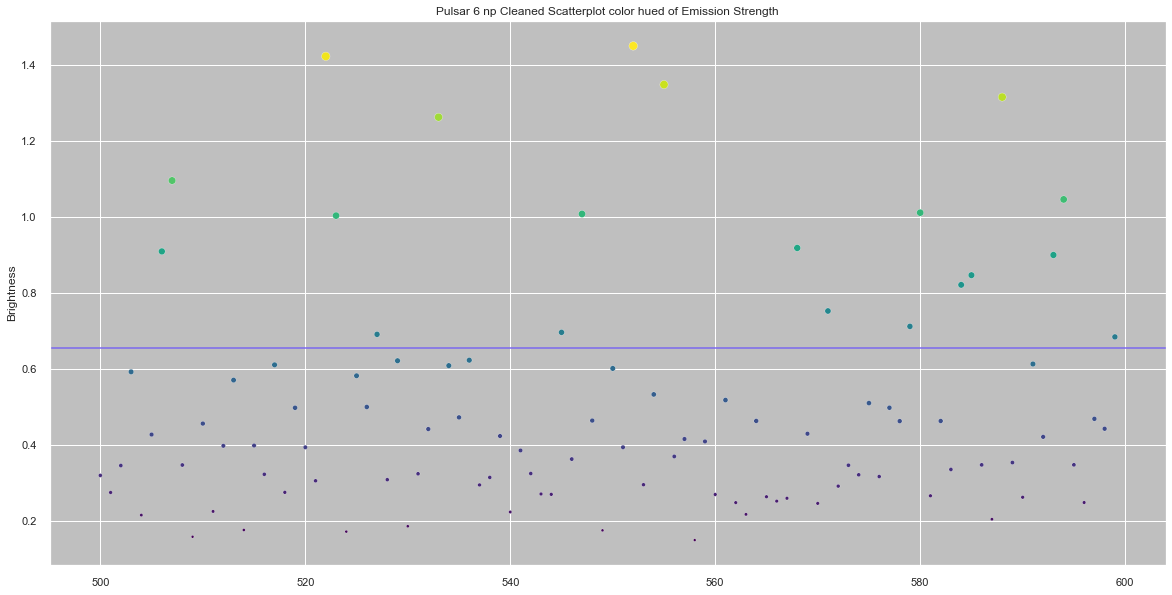

In [119]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame6.Brightness.values
ax = sns.scatterplot(data=frame6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.65585835, ls='-',c='mediumslateblue')

In [120]:
print(frame7)

storeover1 = len(frame7[(frame7.Brightness > frame7["Brightness"].median())])
storeunder1 = len(frame7[(frame7.Brightness < frame7["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
600           601    0.414580     0.086803       0
601           602    0.402591     0.048988       0
602           603    0.262810     0.051387       0
603           604    0.478029     0.051171       0
604           605    0.550959     0.051926       0
..            ...         ...          ...     ...
695           696    0.587157     0.063951       0
696           697    0.960184     0.067335       1
697           698    0.737656     0.077077       1
698           699    0.592272     0.061570       0
699           700    0.458827     0.060779       0

[100 rows x 4 columns]


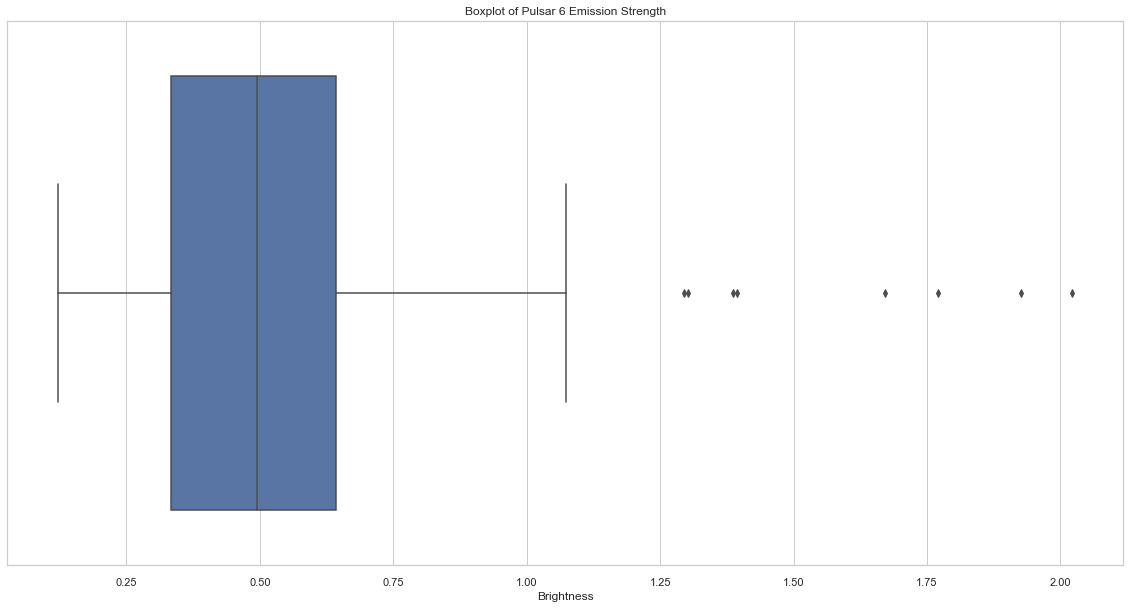

In [121]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame7["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

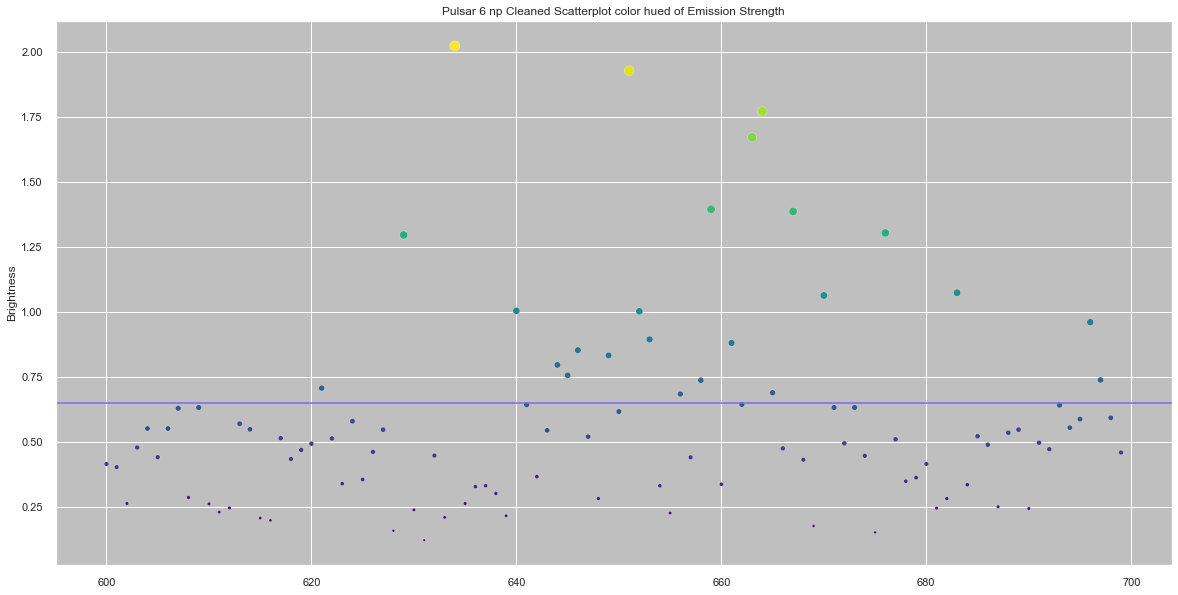

In [122]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame7.Brightness.values
ax = sns.scatterplot(data=frame7["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6504474499999999, ls='-',c='mediumslateblue')

In [123]:
framebinary
#this didn't go to plan.

[0, 0, 0, 0, 0, 0, 0]

#### Randomness testing

In [124]:
np.savetxt(r'framebinarypulsar1.txt', framebinary, fmt='%d', delimiter='')
np.savetxt(r'every5thbinarypulsar1.txt', held5ths.Binary, fmt='%d', delimiter='')
np.savetxt(r'allpulsar1.txt', pulsar6.Binary, fmt='%d', delimiter='')
np.savetxt(r'npcleanedpulsar1.txt', pulsar6npcleaned.Binary, fmt='%d', delimiter='')